# Decision Tree

In [9]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
d=pd.read_csv('g-09-w2.csv')

In [11]:
X_train, X_test, y_train, y_test = train_test_split( d.iloc[:,1:], d.iloc[:,0], test_size = 0.3, random_state = 100)

Text(0,0.5,'accuracy')

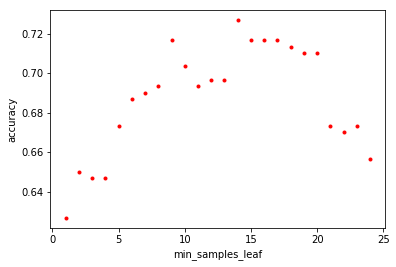

In [126]:
accuracy=[]
for n_leaf in range(1,25):
    clf = DecisionTreeClassifier(criterion = "entropy", random_state = 100, min_samples_leaf=n_leaf,splitter='best')
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
accuracy=np.array(accuracy)
max_accuracy_index=np.argmax(accuracy) # finds the min_samples_leaf with max accuracy
plt.plot(range(1,25),accuracy,'r.')
plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy')

In [127]:
print("Accuracy:",accuracy[max_accuracy_index])
print(max_accuracy_index)

Accuracy: 0.7266666666666667
13


In [96]:
# print(confusion_matrix(y_test, y_pred))  
# print(classification_report(y_test, y_pred)) 

### For Visualisation of tree

In [15]:
feature_cols=list(d.columns[1:])
feature_cols

['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12']

In [16]:
class_names=np.unique(d.y)
class_names.tolist()
class_names = [str(x) for x in class_names]
class_names

['1.0', '2.0', '3.0', '4.0', '5.0']

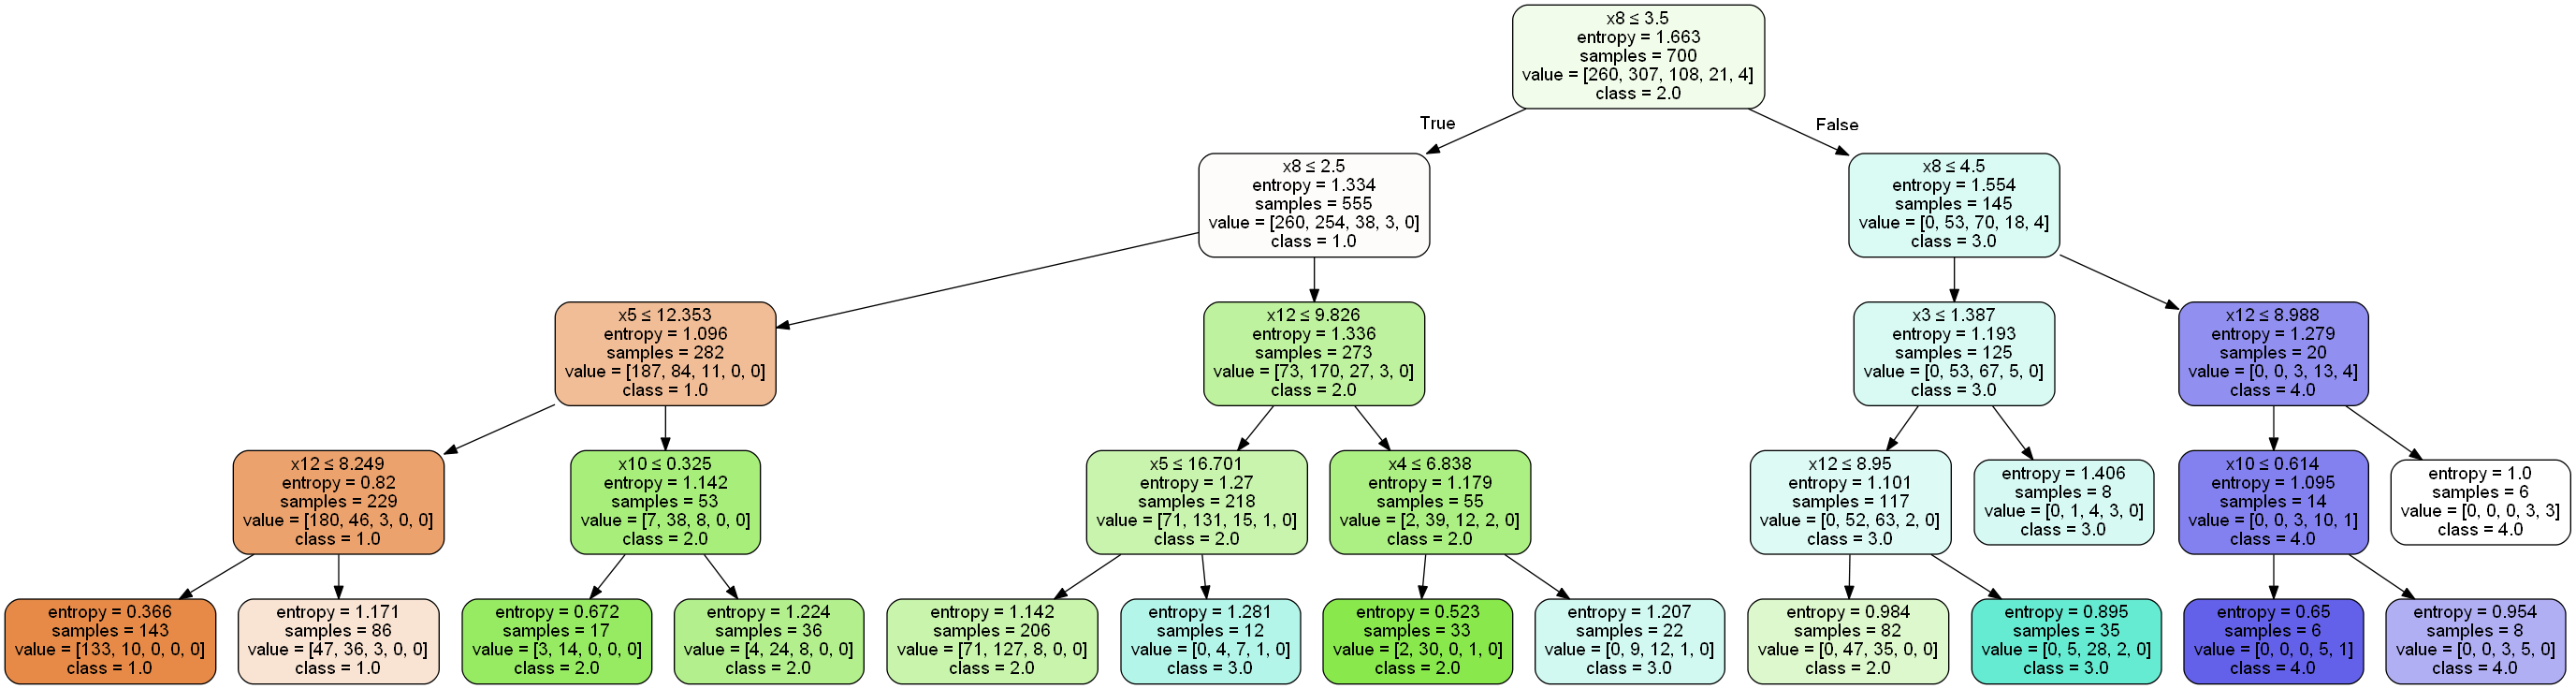

In [17]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

# BAGGING

In [99]:
from sklearn.ensemble import BaggingClassifier


Text(0,0.5,'accuracy')

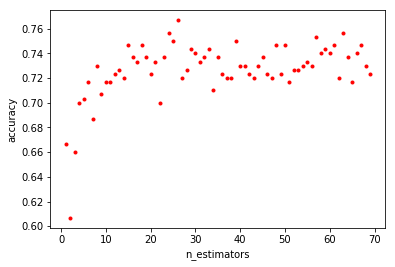

In [130]:
accuracy=[]
for n_est in range(1,70):
    b_clf=BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=n_est, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)
    b_clf = b_clf.fit(X_train,y_train)
    y_pred = b_clf.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
accuracy=np.array(accuracy)
max_accuracy_index=np.argmax(accuracy) # finds the min_samples_leaf with max accuracy
plt.plot(range(1,70),accuracy,'r.')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')

In [132]:
print("Accuracy:",accuracy[max_accuracy_index])
print(max_accuracy_index+1) #because indexing starts from zero

Accuracy: 0.7666666666666667
25


# Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

Text(0,0.5,'accuracy')

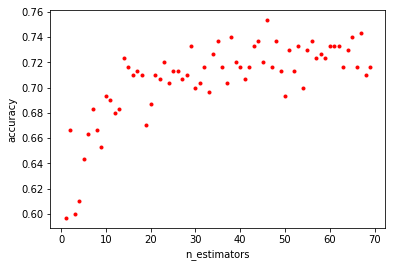

In [133]:
accuracy=[]
for n_est in range(1,70):
    r_clf=RandomForestClassifier(n_estimators=n_est, bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
    r_clf = r_clf.fit(X_train,y_train)
    y_pred = r_clf.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
accuracy=np.array(accuracy)
max_accuracy_index=np.argmax(accuracy) # finds the min_samples_leaf with max accuracy
plt.plot(range(1,70),accuracy,'r.')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')

In [134]:
print("Accuracy:",accuracy[max_accuracy_index])
max_accuracy_index+1

Accuracy: 0.7533333333333333


45

# AdaBoost

In [68]:
from sklearn.ensemble import AdaBoostClassifier

Text(0,0.5,'accuracy')

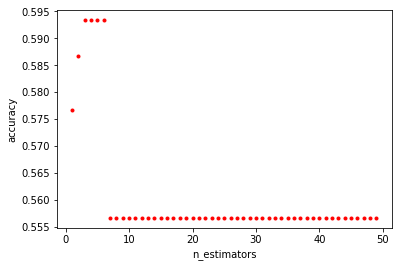

In [138]:
accuracy=[]
for n_est in range(1,50):
    a_clf=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=n_est, random_state=None)
    a_clf = a_clf.fit(X_train,y_train)
    y_pred = a_clf.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
accuracy=np.array(accuracy)
max_accuracy_index=np.argmax(accuracy) # finds the min_samples_leaf with max accuracy
plt.plot(range(1,50),accuracy,'r.')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')

In [137]:
print("Accuracy:",accuracy[max_accuracy_index])
print(max_accuracy_index+1)

Accuracy: 0.5933333333333334
3


# KNN Classification

In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Text(0,0.5,'accuracy')

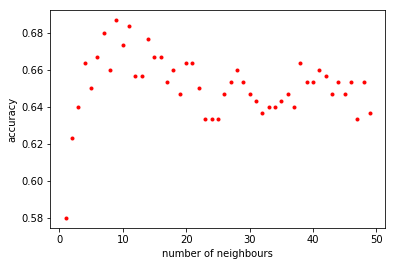

In [139]:
accuracy=[]
for n_neigh in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=n_neigh)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
accuracy=np.array(accuracy)
max_accuracy_index=np.argmax(accuracy) # finds the min_samples_leaf with max accuracy
plt.plot(range(1,50),accuracy,'r.')
plt.xlabel('number of neighbours')
plt.ylabel('accuracy')

In [140]:
print("Accuracy:",accuracy[max_accuracy_index]*100)
max_accuracy_index +1

Accuracy: 68.66666666666667


9